In [14]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon

#### load Yedoma dataset 

In [11]:
gdf_yedoma = gpd.read_file('data/yedoma_domain_wgs84.shp')

#### create dense fisnet for later reprocessing 

In [31]:
def create_fishnet(xmin, ymin, xmax, ymax, y_grid_size=1, x_grid_size=0.1):
    # Create a list of x and y coordinates for each cell in the fishnet
    y_coords = list(np.arange(int(ymin), int(ymax) + y_grid_size, y_grid_size))
    x_coords = list(np.arange(int(xmin), int(xmax) + x_grid_size, x_grid_size))

    # Create a list of polygons for each cell in the fishnet
    polygons = []
    for y in y_coords:
        for x in x_coords:
            polygons.append(Polygon([(x, y), (x + x_grid_size, y), (x + x_grid_size, y + y_grid_size), (x, y + y_grid_size)]))
    
    # Create a GeoDataFrame from the list of polygons
    fishnet = gpd.GeoDataFrame(geometry=polygons)
    
    # Set the coordinate reference system (CRS) to WGS84
    fishnet.crs = 'EPSG:4326'
    
    # Add the southern latitude coordinate as an attribute
    fishnet['latitude'] = fishnet.geometry.bounds['miny']
    
    return fishnet

In [63]:
gdf_yedoma.geometry.bounds.min(), gdf_yedoma.geometry.bounds.max()

minx    179.855431
miny     76.200429
maxx    180.000000
maxy     76.203758
dtype: float64

In [74]:
xgrid=0.1
#xgrid=0.01

In [75]:
fishnet = create_fishnet(-180, 59, 180, 77, x_grid_size=xgrid, y_grid_size=1)

In [76]:
#calculate intersection
intersection = fishnet.overlay(gdf_yedoma, how='intersection')

In [77]:
# reproject to equal area projection - native yedoma dataset projection
intersection_IAEA = intersection.to_crs('EPSG:3571')

In [78]:
# calculate area per segment
intersection_IAEA['yedoma_area'] = intersection_IAEA.area * 1e-6

In [79]:
# group areas to sum per latitude
yedoma_area_grouped = intersection_IAEA.groupby('latitude').sum().reset_index(drop=False)

In [80]:
yedoma_area_grouped.to_csv('yedoma_area_km2_per_latitude_01grid.csv') - based on 
#yedoma_area_grouped.to_csv('yedoma_area_km2_per_latitude_001grid.csv')

In [81]:
yedoma_area_grouped_01 = yedoma_area_grouped.copy()
#yedoma_area_grouped_001 = yedoma_area_grouped.copy()

In [89]:
yedoma_area_grouped_01.sum() - yedoma_area_grouped_001.sum()

latitude       0.000000e+00
Shape_Leng    -8.953830e+11
Shape_Area    -4.601625e+16
yedoma_area    1.048107e-02
dtype: float64

<AxesSubplot: xlabel='latitude'>

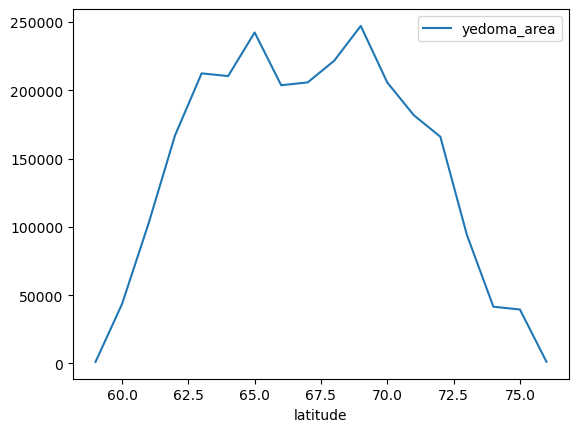

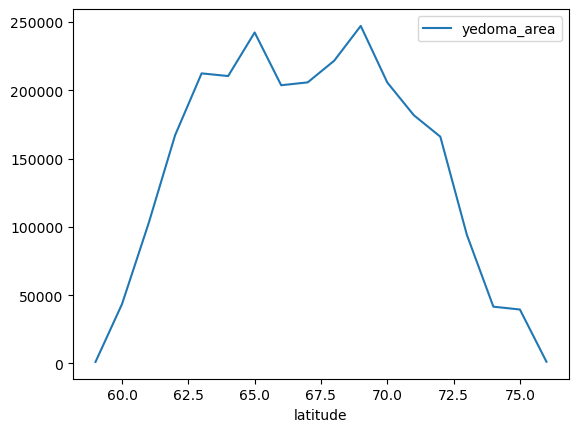

In [82]:
# plot
yedoma_area_grouped_01.plot(x='latitude', y='yedoma_area')
yedoma_area_grouped_001.plot(x='latitude', y='yedoma_area')